# Al Charge Radius Plot

Kurtis Bartlett

2017/3/3

Ipython notebook for generating plot of extracted and theoretically predicted <sup>27</sup>Al charge radii.

In [1]:
# Import the necessary packages and modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pp
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
pp.rcParams["text.usetex"] = "True"
pp.rcParams["font.family"] = "serif"
pp.rcParams["font.serif"] = "Computer Modern Roman"
pp.rcParams["font.sans-serif"] = "Computer Modern Sans serif"

In [3]:
# Keep matplotlib plot inline
%matplotlib inline

In [4]:
pp.style.use('seaborn-ticks')
sns.set_palette("muted")
plot_size = 6*np.array([1.0,(2.0/(1.0+np.sqrt(5.0)))]) #Use Golden ratio as aspect ratio for plots

In [5]:
# Theoretical Calculation
theory_cal = np.array([3.013]) #[fm]
theory_cal_err = np.array([0.000]) #[fm]

# Electron Scattering Data
e_scattering_data = np.array([3.06, 3.05, 3.035]) #[fm]
#Using Springer Materials Reference.
#e_scattering_data_err = np.array([0.09, 0.05, 0.040]) #[fm]
#Using Atomic Data and Nuclear Data Tables (1987)
e_scattering_data_err = np.array([0.09, 0.05, 0.002]) #[fm]

# Muonic Atomic Data
muon_atom_data = np.array([3.062]) #[fm]
muon_atom_data_err = np.array([0.003]) #[fm]

In [6]:
measurements = np.concatenate((e_scattering_data,muon_atom_data))
measurements_err = np.concatenate((e_scattering_data_err,muon_atom_data_err))

In [7]:
# Calculate Error Weight Average
weight_factor=1/(measurements_err*measurements_err)
[ewa,sum_weights]=np.average(measurements, weights=weight_factor,returned=True)
ewa_err=np.sqrt((1/sum_weights))
# Calculate Chi^2 and degrees of freedom
chi_sq=(weight_factor*np.square(ewa*np.ones(len(measurements))-measurements)).sum()
dof=len(measurements)-1
scale_val=np.sqrt(chi_sq/dof)
scaled_err=ewa_err*scale_val
avg_text='Measurement\nAVG: {0:.3f}$\pm${1:.3f} fm'.format(ewa, scaled_err)

In [8]:
print('EWA:         {0:.3f} fm\n'.format(ewa)+
      'EWA_Err:     {0:.3f} fm\n'.format(ewa_err)+
      'Chi^2:       {0:.3f}\n'.format(chi_sq)+
      'DOF:         {0:d}\n'.format(dof)+
      'Chi^2/DOF:   {0:.3f}\n'.format(chi_sq/dof)+
      'Scale Value: {0:.3f}\n'.format(scale_val)+
      'Scaled_Err:  {0:.3f} fm'.format(scaled_err))

EWA:         3.043 fm
EWA_Err:     0.002 fm
Chi^2:       56.129
DOF:         3
Chi^2/DOF:   18.710
Scale Value: 4.325
Scaled_Err:  0.007 fm


In [9]:
# Vertical Axis Names
y_axis_position = [0.5, 1.0, 1.5, 2.0, 2.5]
y_axis_labels = ['', '', '', '','']

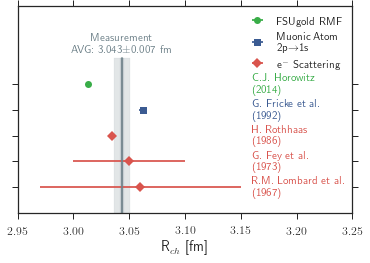

In [10]:
pp.figure(figsize=plot_size)
pp.errorbar(theory_cal,
            [2.5],
            xerr=theory_cal_err,
            label='FSUgold RMF',
            ls='none',
            marker='o',
            color=sns.xkcd_rgb['medium green'])
pp.errorbar(muon_atom_data,
            [2.0], 
            xerr=muon_atom_data_err,
            label='Muonic Atom\n 2p$\\rightarrow$1s',
            ls='none',
            marker='s',
            color=sns.xkcd_rgb['denim blue'])
pp.errorbar(e_scattering_data,
            [0.5, 1.0, 1.5], 
            xerr=e_scattering_data_err, 
            label='e$^{-}$ Scattering', 
            ls='none', 
            marker='D', 
            color=sns.xkcd_rgb['pale red'])
pp.plot([ewa,ewa],[0.0,3.0],
        #label=avg_text,
        ls='-',
        color=sns.xkcd_rgb['steel grey'])
pp.fill_between([ewa-ewa_err,ewa+ewa_err],0.0,3.0,
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
pp.fill_between([ewa-scaled_err,ewa+scaled_err],0.0,3.0,
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
pp.text(ewa,3.5,
        avg_text,
        fontsize=11,
        color=sns.xkcd_rgb['steel grey'],
        verticalalignment='top',
        horizontalalignment='center')
pp.text(3.16, 2.5,
        'C.J. Horowitz\n(2014)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['medium green'])
pp.text(3.16, 2.0, 
        'G. Fricke et al.\n(1992)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['denim blue'])
pp.text(3.16, 1.5,
        'H. Rothhaas\n(1986)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['pale red'])
pp.text(3.16, 1.0,
        'G. Fey et al.\n(1973)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['pale red'])
pp.text(3.16, 0.5,
        'R.M. Lombard et al.\n(1967)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['pale red'])
#pp.text(3.25, -0.5,
#        'Measurement Sources: G. Fricke, K. Heilig, Nuclear Charge Radii 13-Al Aluminum: Datasheet from Landolt-Bornstein, Springer Materials (2004)',
#        fontsize=8,
#        verticalalignment='center',
#        horizontalalignment='center')
pp.xlabel('R$_{ch}$ [fm]', fontsize=14)
#pp.ylabel('', fontsize=12)
pp.legend(loc='upper right', fontsize=11)
pp.xticks(fontsize=12)
pp.yticks(y_axis_position,y_axis_labels, fontsize=12)
#pp.xlim(2.5,3.5)
pp.xlim(2.95,3.25)
pp.ylim(0.0,4.0)
pp.savefig('al_charge_radius_plot.png', bbox_inches='tight')
pp.savefig('al_charge_radius_plot.pdf', bbox_inches='tight')
pp.show()